In [13]:
# Copying all usefull libraries
import numpy as np
from matplotlib import pyplot as plt
import sys

In [14]:
a = sys.path.append('codes/')

In [15]:
from codes import grids
from codes import auxiliars
from codes import prism

In [16]:
# Definition for number of points and grid creation
shape = (100, 100)
x, y, z = grids.my_regular((-4000., 6000., -4000., 6000.), shape, -50.)


In [17]:
# Setting the parameters for prism
model = [-500., 2000., -500., 3000., 550., 2500.] 

# Writing inclination, declination, azimuth 
incf, decf = -45, -30 # regional field

incs, decs = -34.25, -18.5


# Setting the parameters for prism
model1 = [-500, 2464, -500.,3010, 550, 2550] 



# Writing inclination, declination, azimuth 
incf, decf = -45, -30 # regional field
incs, decs = -34.25, -18.5         

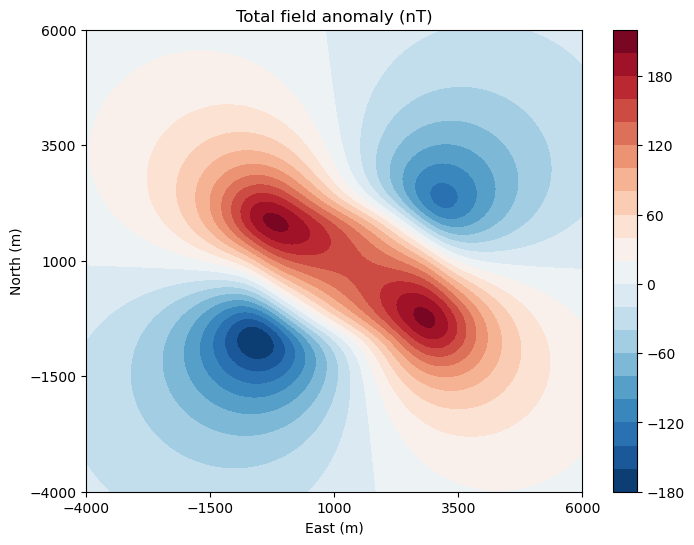

In [18]:
# Calculating total field due to a solid prims
tf_ca = prism.my_prism_tf(x, y, z, model, 2., incf, decf, incs, decs ,20)+prism.my_prism_tf(x, y, z, model , 2, incf, decf, incs, decs ,206) 
# Ploting all results 
plt.close('all')
plt.figure(figsize=(8,6))

plt.contourf(y.reshape(shape), x.reshape(shape), tf_ca.reshape(shape), 20, cmap = plt.cm.RdBu_r)
plt.title('Total field anomaly (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()

plt.show()

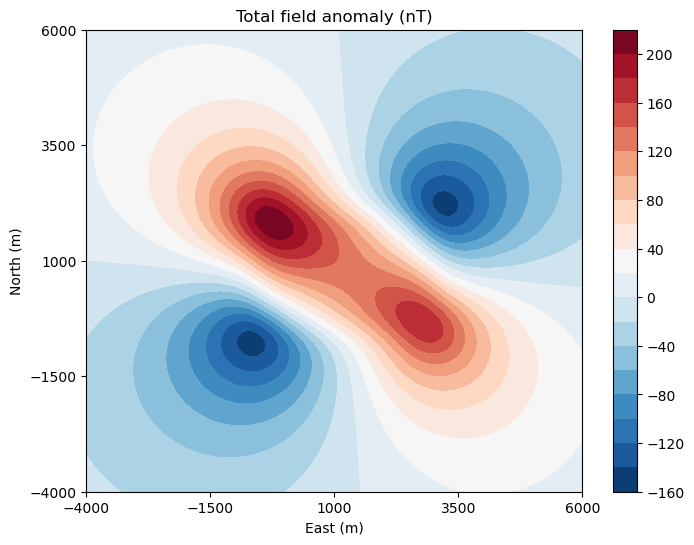

In [19]:
# Calculating total field due to a solid prims
tf_caa = prism.my_prism_tf(x, y, z, model, 2., incf, decf, incs, decs ,20)+prism.my_prism_tf(x, y, z, model, 1.89, incf, decf, incs, decs ,200) 
# Ploting all results 
plt.close('all')
plt.figure(figsize=(8,6))

plt.contourf(y.reshape(shape), x.reshape(shape), tf_caa.reshape(shape), 20, cmap = plt.cm.RdBu_r)
plt.title('Total field anomaly (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()

plt.show()

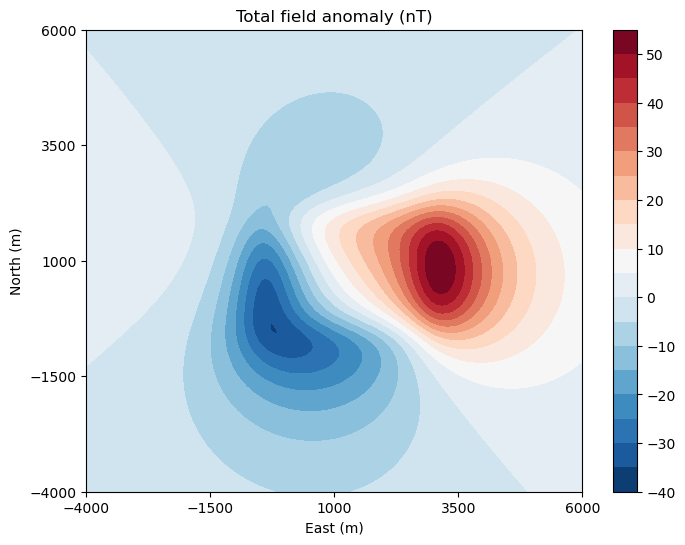

In [20]:
tf_err1 = tf_ca - tf_caa
# Ploting all results 
plt.close('all')
plt.figure(figsize=(8,6))

plt.contourf(y.reshape(shape), x.reshape(shape), tf_err1.reshape(shape), 20, cmap = plt.cm.RdBu_r)
plt.title('Total field anomaly (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()

plt.show()

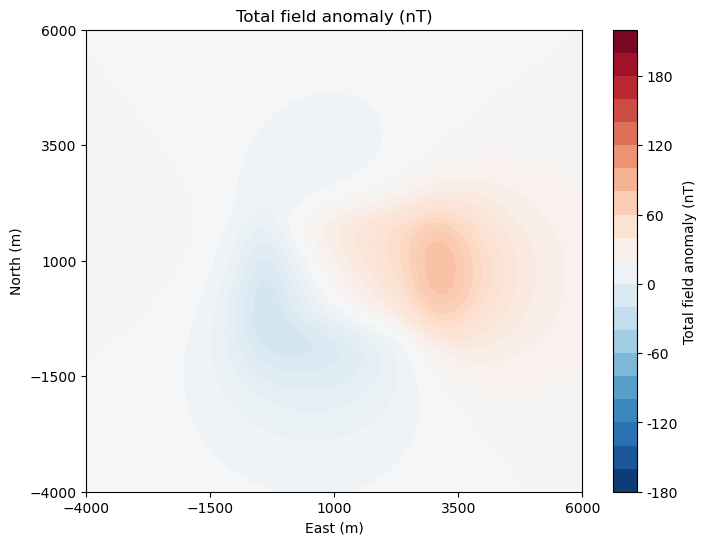

In [21]:
import matplotlib.colors as mcolors
from matplotlib.ticker import FormatStrFormatter

tf_err1 = tf_ca - tf_caa

# Plotting all results
plt.close('all')
plt.figure(figsize=(8,6))

# Force the color scale to be from -240 to 480, regardless of data range
#contour = plt.contourf(y.reshape(shape), x.reshape(shape), tf_err.reshape(shape), 20, cmap=plt.cm.RdBu_r, vmin=-240, vmax=480)
contour = plt.contourf(y.reshape(shape), x.reshape(shape), tf_ca.reshape(shape), 20, cmap = plt.cm.RdBu_r)
# Adding color bar with fixed limits
cbar = plt.colorbar(contour)

# Set colorbar ticks to ensure proper spacing and no overlap
# cbar.set_ticks([-240, -120, 0, 120, 240, 360, 480])

# Formatting the colorbar ticks to show clean numbers
cbar.ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Adding a label for the color bar
cbar.set_label('Total field anomaly (nT)', fontsize=10)
plt.contourf(y.reshape(shape), x.reshape(shape), tf_err1.reshape(shape), 20, cmap=plt.cm.RdBu_r, vmin=-180, vmax=180)
plt.title('Total field anomaly (nT)', fontsize=12)

plt.xlabel('East (m)', fontsize=10)
plt.ylabel('North (m)', fontsize=10)

# Customizing the ticks on x and y axes for better readability
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))

plt.show()


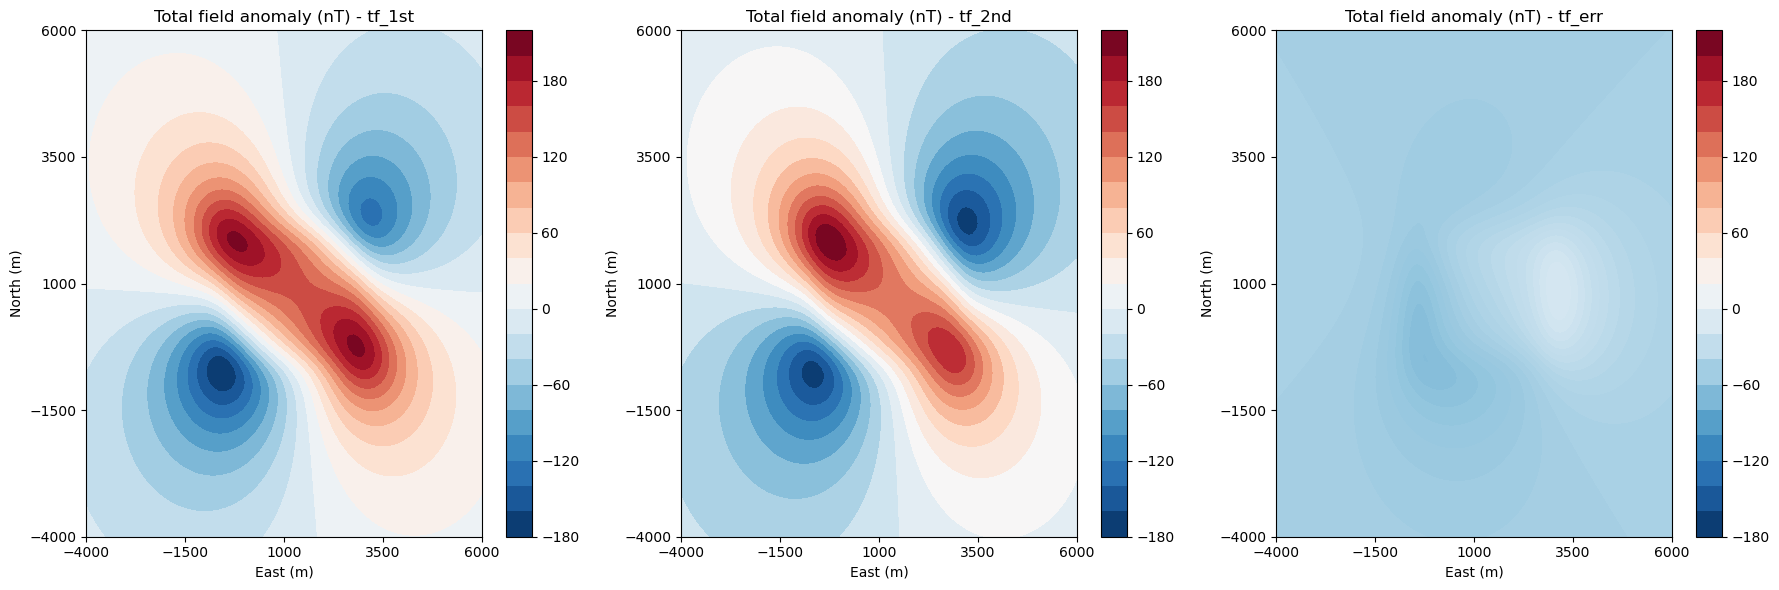

In [22]:
# Create a figure and subplots stacked horizontally
import matplotlib.pyplot as plt
plt.close('all')
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# First plot for tf_1st
cf1 = ax[0].contourf(y.reshape(shape), x.reshape(shape), tf_ca.reshape(shape), 20, cmap=plt.cm.RdBu_r)
ax[0].set_title('Total field anomaly (nT) - tf_1st', fontsize=12)
ax[0].set_xlabel('East (m)', fontsize=10)
ax[0].set_ylabel('North (m)', fontsize=10)
ax[0].set_xticks(np.linspace(x.min(), x.max(), 5))
ax[0].set_yticks(np.linspace(y.min(), y.max(), 5))
fig.colorbar(cf1, ax=ax[0])

# Second plot for tf_2nd
cf2 = ax[1].contourf(y.reshape(shape), x.reshape(shape), tf_caa.reshape(shape), 20, cmap=plt.cm.RdBu_r)
ax[1].set_title('Total field anomaly (nT) - tf_2nd', fontsize=12)
ax[1].set_xlabel('East (m)', fontsize=10)
ax[1].set_ylabel('North (m)', fontsize=10)
ax[1].set_xticks(np.linspace(x.min(), x.max(), 5))
ax[1].set_yticks(np.linspace(y.min(), y.max(), 5))
fig.colorbar(cf1, ax=ax[1])

# Third plot for tf_err with fixed color range from -240 to 480
cf3 = ax[2].contourf(y.reshape(shape), x.reshape(shape), tf_err1.reshape(shape), 20, cmap=plt.cm.RdBu_r, vmin=-240, vmax=480)
ax[2].set_title('Total field anomaly (nT) - tf_err', fontsize=12)
ax[2].set_xlabel('East (m)', fontsize=10)
ax[2].set_ylabel('North (m)', fontsize=10)
ax[2].set_xticks(np.linspace(x.min(), x.max(), 5))
ax[2].set_yticks(np.linspace(y.min(), y.max(), 5))
fig.colorbar(cf1, ax=ax[2])

# Show the plots
plt.tight_layout()  # To avoid overlapping of subplots
plt.show()


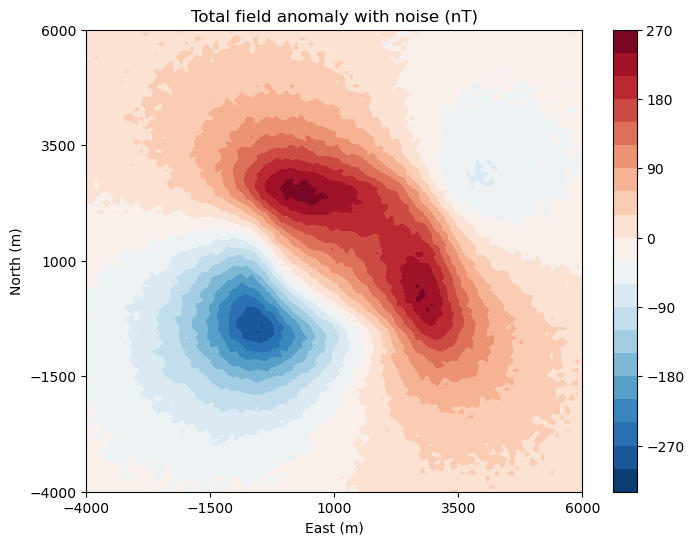

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from codes import prism

# Function to add noise
def add_noise(data, mean=0, std=5):
    noise = np.random.normal(mean, std, data.shape)
    return data + noise

# Setting the parameters for prism
model = [-500., 2500., -500., 3000., 550., 2500.] 

# Generating grid coordinates
x = np.linspace(-4000, 6000, 100)
y = np.linspace(-4000, 6000, 100)
z = np.zeros_like(x)

# Generating meshgrid
x, y = np.meshgrid(x, y)

# Writing inclination, declination, azimuth 
incf, decf = -45, -30 # regional field
incs, decs = -34.25, -18.5

# Computing total field anomaly
tf = prism.my_prism_tf(x, y, z, model, 2., incf, decf, incs, decs, 0) + prism.my_prism_tf(x, y, z, model1, 1.89, incf, decf, incs, decs, 208)

# Adding noise
tf_with_noise = add_noise(tf)

# Ploting results with noise
plt.close('all')
plt.figure(figsize=(8, 6))
plt.contourf(y.reshape(tf.shape), x.reshape(tf.shape), tf_with_noise, 20, cmap=plt.cm.RdBu_r)
plt.title('Total field anomaly with noise (nT)', fontsize=12)
plt.xlabel('East (m)', fontsize=10)
plt.ylabel('North (m)', fontsize=10)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()
plt.show()
